# Import the libraries and dataset

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import time
!pip install plotly
import plotly.express as ply

In [5]:
import plotly.io as pio
pio.templates.default = 'plotly_dark'

In [6]:
bank = pd.read_csv('bankruptcy-prevention.csv', sep=';')
bank.head()

industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk       class  
0               0.0              0.5  bankruptcy  
1               0.0              1.0  bankruptcy  
2               0.0              1.0  bankruptcy  
3               0.0              1.0  bankruptcy  
4               0.0              1.0  bankruptcy

# Exploratory data analysis 

So we have import dataset, now let's take a look.

the first is getting infomation about dataset

**We will check the following points for data validation**:
1. NaN values
2. Typing errors
3. Duplicate values
4. Mixed datatype
5. Membership constraint (like blood group can't be D+)
6. Regular expression patterns (like mobile number have 10 digits (in india))
7. Cross field validation (like admission data come before discharge)
8. Empty cell or row or column.

After following the steps given above,it results in clean and uniform dataset.

**Now we can explore and visualize the following things:**
1. Distribution of data.
2. outliers detection and replacement if necessary.
3. Use Boxplot, Density plot, Histogram to get more detail regarding **concentration, distribution,
skewness, outliers, range etc** of data.
4. Check the Correlation between the variables.
5. **Use scatterplot and PCA method** with 'hue' to get insides, regarding the decision boundary in case of **classification problem**.
6. We can use K-mean clustering method to get some more insides for selection of model in classification case.
7. Perform the remaining Univariate, Multi-variate analysis with graphical and non-graphical method.

In [7]:
import pandas_profiling as pp

In [8]:
EDA_report= pp.ProfileReport(bank)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


> Looks like there is a problem in the names of the columns. there is a **space** at starting of the name of columns, so we need to correct it first.

> So there is no null values and the columns data is in same type (float), so there is no chances for having null values in other format like in string or symbolic. (eg, '?', 'don't know' etc)

In [10]:
colm = []
for col in bank.columns:
    print(col)
    col=col.strip()
    colm.append(col)
 
bank.columns = colm
bank.head(2)

industrial_risk
 management_risk
 financial_flexibility
 credibility
 competitiveness
 operating_risk
 class


industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   

   competitiveness  operating_risk       class  
0              0.0             0.5  bankruptcy  
1              0.0             1.0  bankruptcy

In [11]:
bank.rename(columns= {'class': 'target_variable'}, inplace=True)

In [12]:
bank.tail(2)

industrial_risk  management_risk  financial_flexibility  credibility  \
248              1.0              0.0                    0.5          1.0   
249              1.0              0.0                    0.5          0.5   

     competitiveness  operating_risk target_variable  
248              0.5             0.0  non-bankruptcy  
249              1.0             1.0  non-bankruptcy

## Let's check for **NaN values**

In [13]:
bank.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
target_variable          0
dtype: int64

 We already know that, there are zero null values from info and also now from isnull() function

In [14]:
bank['target_variable'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: target_variable, dtype: int64

So now the data is cleaned, we can apply the visualization method.

In [15]:
bank_final = bank.copy()

In [16]:
bank_final.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk target_variable  
0              0.0             0.5      bankruptcy  
1              0.0             1.0      bankruptcy  
2              0.0             1.0      bankruptcy  
3              0.0             1.0      bankruptcy  
4              0.0             1.0      bankruptcy

## Visualization

Let's start visualization with following plots:
1. Box plot
2. Histogram
3. Countplot
4. Voilin plot
5. Scatterplot or pairplot
6. Density plot

In [17]:
plt.figure(figsize=(15,5))
sn.boxplot(data = bank_final, palette=sn.color_palette("ch:2,r=.2,l=.6"))

<AxesSubplot:>

In [15]:
ply.box(data_frame=bank_final.iloc[:,0:-1])

In [18]:
def countplots(data):
    plt.subplots(3,2, figsize = (15,25))
    i = 1
    for feature in data.columns:
        plt.subplot(4,2,i)
        sn.countplot(data = data, x = feature, hue='target_variable',)
        i+=1 

In [19]:
countplots(bank_final)

In [20]:
sn.scatterplot(data = bank_final, x = 'industrial_risk', y = 'management_risk', hue = 'target_variable', 
               size= 'target_variable', sizes=[100,100], palette=sn.dark_palette('purple', n_colors=2))
plt.legend(loc = 'center')

<Figure size 1440x3600 with 0 Axes>

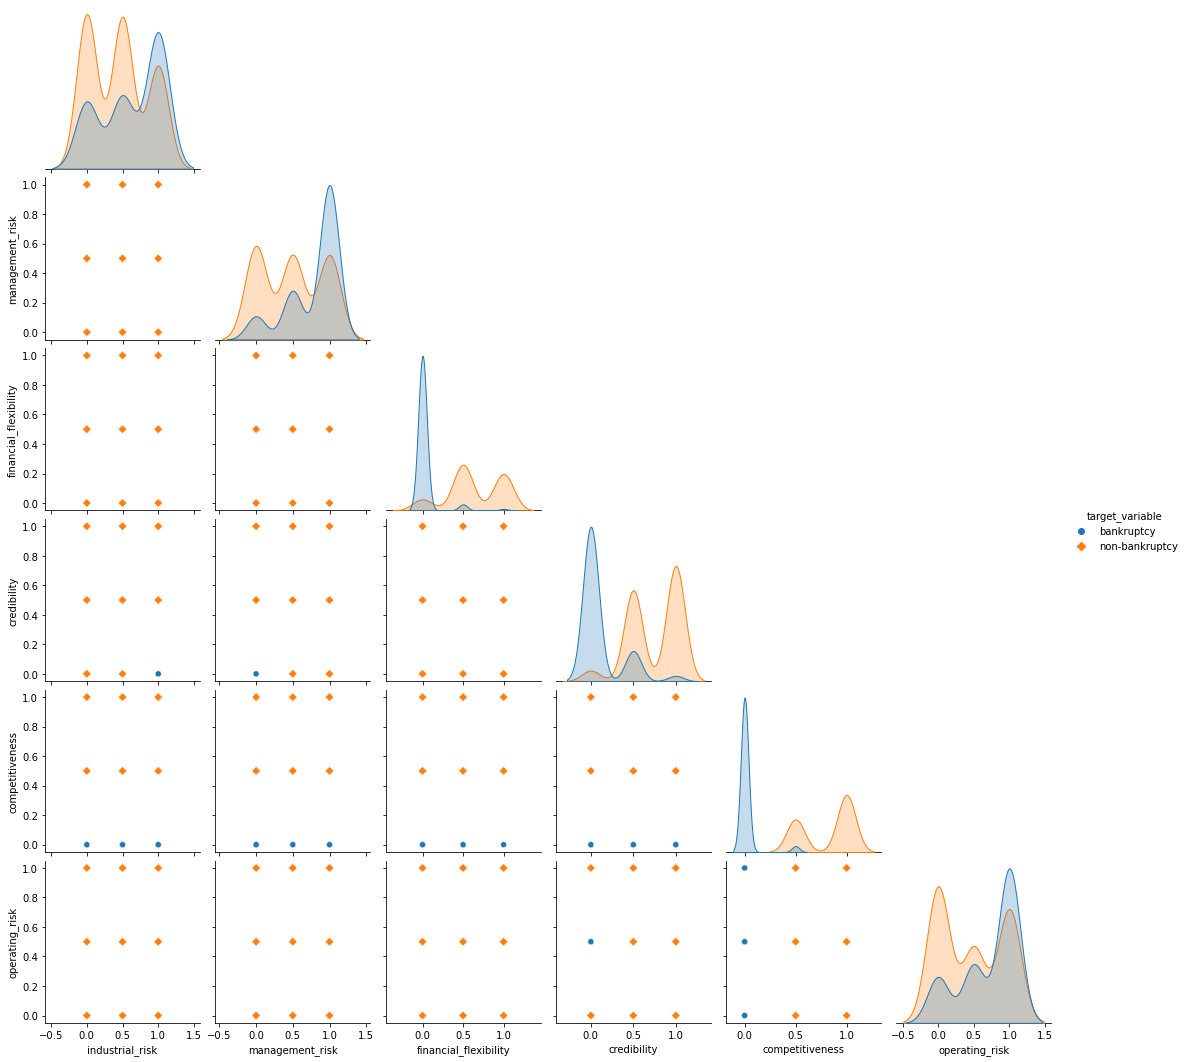

In [21]:
plt.figure(figsize=(20,50))
sn.pairplot(data = bank_final, hue = 'target_variable', markers=['o', 'D'], corner=True)

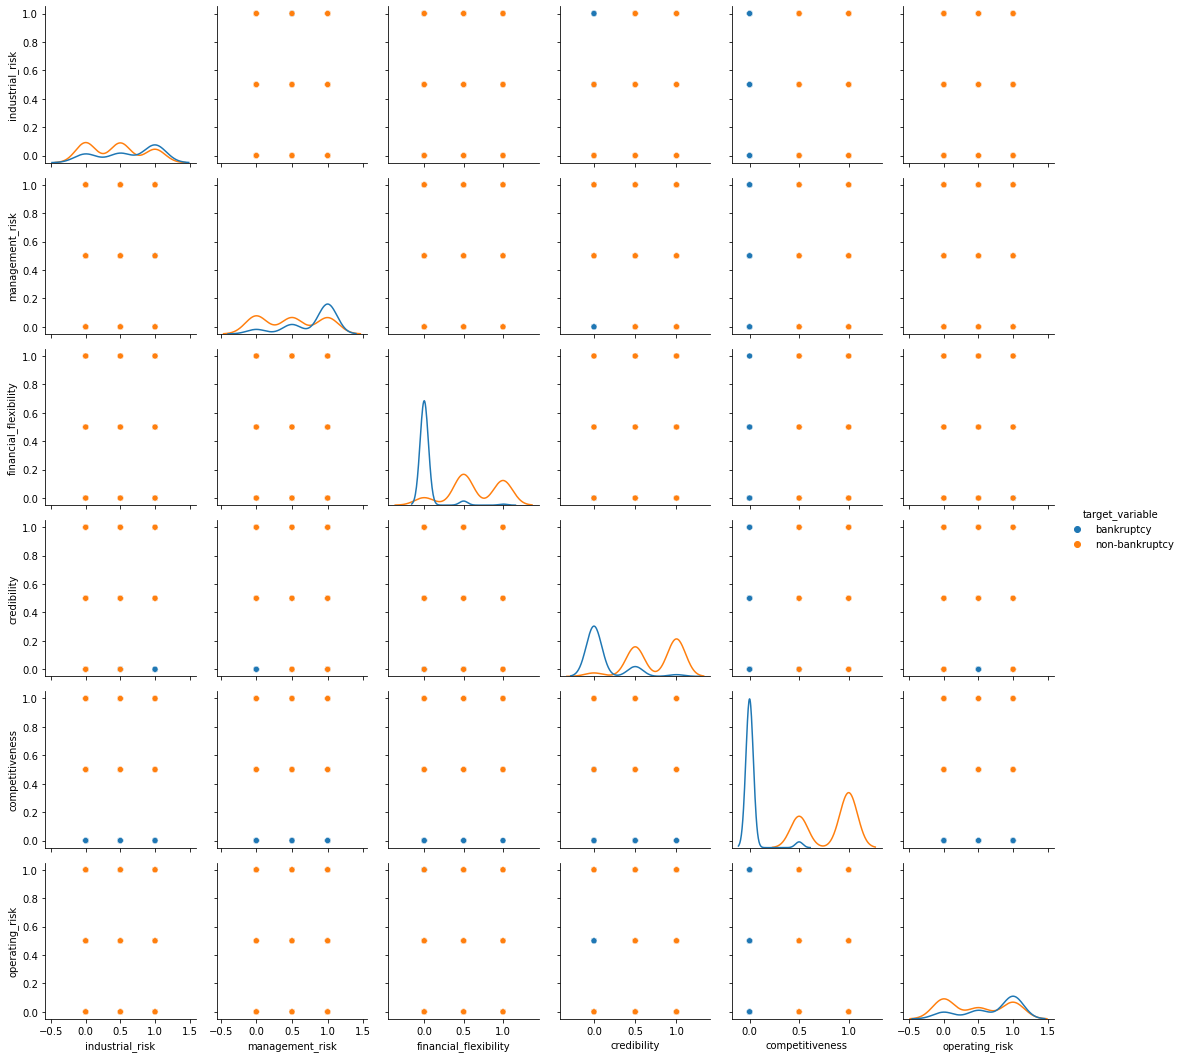

In [22]:
g = sn.PairGrid(data = bank_final, hue='target_variable')
g.map_diag(sn.kdeplot)
g.map_offdiag(sn.scatterplot)
g.add_legend()

> **🏹 NOTE:** If we take a look at the competitiveness, when it is equal to 0 regardless of other features the company going to bankrupt and also 

> **Note that** the competitiveness means the ability of company to compete with other company. if it is zero, hence company can't compete with other so it will go bankrupt

**Some key observation:**

1. We have categorical variables for features and target variable. so actually looking for outliers doesn't make any sense.
2. Distribution plot will show us the count of various feature variables.
3. The most important result came from the scatter plot or pairplot regarding **Competitiveness**.
4. There are lots of duplicate values.
5. Mathematically the **largest possible size of data will be 1458 unique rows**

## Encoding categorical variables

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
def encode_manually(data):
    for feature in data.columns:
        if data[feature].dtype == object:
            print(f'Encoding {feature}:')
            variables = list(data[feature].unique())
            encode_number = range(len(variables))
            encodings_dict = dict(zip(variables, encode_number))
            print(encodings_dict)
            data[feature]=data[feature].map(encodings_dict)
            return encodings_dict

In [25]:
encode_manually(bank_final)

Encoding target_variable:
{'bankruptcy': 0, 'non-bankruptcy': 1}


{'bankruptcy': 0, 'non-bankruptcy': 1}

In [26]:
bank_final.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk  target_variable  
0              0.0             0.5                0  
1              0.0             1.0                0  
2              0.0             1.0                0  
3              0.0             1.0                0  
4              0.0             1.0                0

In [27]:
bank_final.tail()

industrial_risk  management_risk  financial_flexibility  credibility  \
245              0.0              1.0                    1.0          1.0   
246              1.0              1.0                    0.5          1.0   
247              0.0              1.0                    1.0          0.5   
248              1.0              0.0                    0.5          1.0   
249              1.0              0.0                    0.5          0.5   

     competitiveness  operating_risk  target_variable  
245              1.0             1.0                1  
246              1.0             0.0                1  
247              0.5             0.0                1  
248              0.5             0.0                1  
249              1.0             1.0                1

<AxesSubplot:>

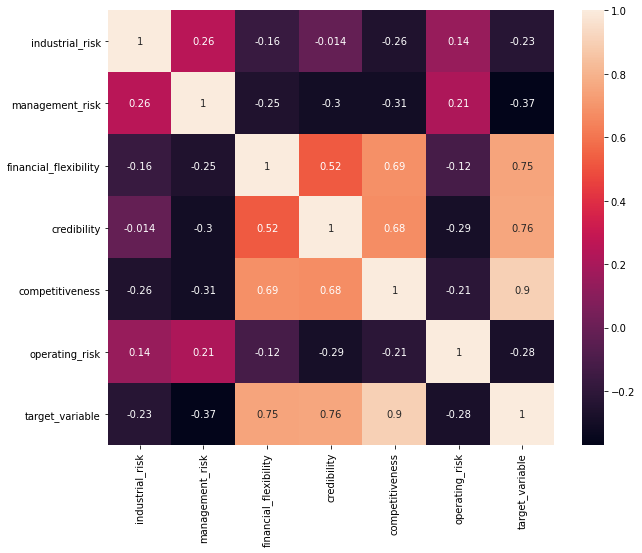

In [28]:
plt.figure(figsize=(10,8))
sn.heatmap(bank_final.corr(), annot=True)

So we get the following observation from correlation heatmap
1. The competitiveness have strong correlation with target variable as observed from scatter plot
2. The credibility, competitiveness and target_variable also have good correlation with each other

## Conclusion from EDA:

So we performed various EDA methods and try to get as much as possible from the dataset. 

- The **bank_final** dataset will be used for model building.


# Model Selection

We have task of classification (prediction of bankruptcy).

We completed the EDA and Feature engineering on the dataset and now we can split and select the model for our job.

There are many classification models like:
1. Logistic regression
2. Decision tree.
3. Random Forest classifier.
4. ExtraRandom Forest classifier.
5. Gradient Boosting.
6. XGBoost
7. LGBoost.
8. CatBoost.
9. AdaBoost.
10. KNN
11. Naive Bayes models.
12. Support vector machine classifier.
13. Neural Network.

In [29]:
import pickle

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(bank_final.iloc[:,:-1], 
                            bank_final.iloc[:,-1], random_state= 3, 
                            test_size=0.2)

In [32]:
X_train.shape, X_test.shape

((200, 6), (50, 6))

## Logistic regression 

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Model Training

In [34]:
classifier = LogisticRegression(penalty='l2', C=0.018)
logistic_model_1 = classifier.fit(X_train, y_train)

In [33]:
logistic_model_1.score(X_test, y_test)

0.96

In [34]:
logistic_model_1.score(X_train, y_train)

0.96

In [35]:
# pickle.dump(logistic_model_1, open('logistic_model_project.pkl', 'wb'))

In [36]:
# load_model_logistic = pickle.load(open('logistic_model_project.pkl', 'rb'))

### For Training data

In [37]:
# Predict for x dataset
y_pred_train = classifier.predict(X_train)
y_pred_train

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [38]:
y_pred_train_df = pd.DataFrame({
    'actual': y_train,
    'predicted_prob': classifier.predict(X_train)
})
y_pred_train_df

actual  predicted_prob
213       1               1
194       1               1
153       1               1
122       1               1
4         0               0
..      ...             ...
200       1               1
184       1               1
131       1               1
152       1               1
106       0               1

[200 rows x 2 columns]

In [39]:
confusion_matrix(y_train, y_pred_train)

array([[ 74,   8],
       [  0, 118]], dtype=int64)

In [40]:
# Accuracy
(74 + 118) / (74 + 8 + 118) * 100

96.0

In [41]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        82
           1       0.94      1.00      0.97       118

    accuracy                           0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



Text(0, 0.5, 'True Positive Rate')

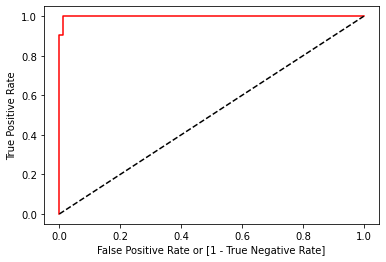

In [42]:
# ROC curves
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(
    y_train, classifier.predict_proba(X_train)[:, 1])

auc = roc_auc_score(y_train, y_pred_train)


plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [43]:
auc

0.951219512195122

### For testing data

In [44]:
y_pred_test = logistic_model_1.predict(X_test)
y_pred_test

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [45]:
y_pred_test_df = pd.DataFrame({
    'actual': y_test,
    'predicted_prob': y_pred_test
})
y_pred_test_df

actual  predicted_prob
16        0               0
64        0               0
233       1               1
70        0               0
178       1               1
43        0               0
6         0               0
23        0               0
14        0               1
137       1               1
83        0               0
130       1               1
88        0               0
215       1               1
31        0               0
234       1               1
208       1               1
204       1               1
203       1               1
136       1               1
3         0               1
38        0               0
115       1               1
101       0               0
121       1               1
109       1               1
98        0               0
170       1               1
73        0               0
195       1               1
74        0               0
134       1               1
15        0               0
214       1               1
232       1               1
161       1               1
61        0               0
57        0               0
77        0               0
40        0               0
181       1               1
230       1               1
102       0               0
139       1               1
46        0               0
155       1               1
58        0               0
159       1               1
209       1               1
45        0               0

In [46]:
confusion_matrix(y_test,y_pred_test)

array([[23,  2],
       [ 0, 25]], dtype=int64)

In [47]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.93      1.00      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Text(0, 0.5, 'True Positive Rate')

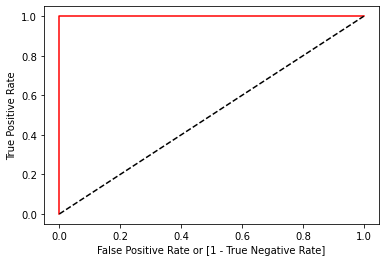

In [48]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(
    y_test, classifier.predict_proba(X_test)[:, 1])

auc = roc_auc_score(y_test, y_pred_test)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [49]:
auc

0.9600000000000001

### Predictions

In [3]:
# say New data for prediction is
new_data=pd.DataFrame({'industrial_risk':0,"management_risk":1,"financial_flexibility":1,"credibility":1,"competitiveness":0,"operating_ris":0},index=[0])
new_data

industrial_risk  management_risk  financial_flexibility  credibility  \
0                0                1                      1            1   

   competitiveness  operating_ris  
0                0              0

In [35]:
# Manual Prediction of Price
logistic_model_1.predict(new_data)

array([1], dtype=int64)